In [11]:
import pandas as pd
import numpy as np
import pymc3 as pm

import scipy as st
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import poisson,skellam


In [12]:
No_of_matches_16_18_G = 36
No_of_goal_conceded_G = 26
No_of_goal_scored_G = 76

No_of_matches_16_18_S = 32
No_of_goal_conceded_S =23
No_of_goal_scored_S = 53


In [49]:
model = pm.Model();
with model:
    goal_conceded_germany = pm.Poisson('goal_conceded_germany',(No_of_goal_conceded_G/No_of_matches_16_18_G))
    goal_scored_germany = pm.Poisson('goal_scored_germany',(No_of_goal_scored_G/No_of_matches_16_18_G))
    goal_conceded_Sweden = pm.Poisson('goal_conceded_Sweden',(No_of_goal_conceded_S/No_of_matches_16_18_S))
    goal_scored_Sweden = pm.Poisson('goal_scored_Sweden',(No_of_goal_scored_S/No_of_matches_16_18_S))
    Sweden_win  = pm.Poisson('Sweden_win',(goal_conceded_germany+goal_scored_Sweden)) 
    Germany_win = pm.Poisson('Germany_win',(goal_conceded_Sweden+goal_scored_germany))
    goal_conceded = pm.Poisson('goal_conceded',(goal_conceded_Sweden+goal_conceded_germany))
    goal_scored = pm.Poisson('goal_scored',(goal_scored_Sweden+goal_scored_germany ))
    trace= pm.sample(100000,tune=50000,progressbar=True)

Assigned Metropolis to goal_conceded_germany
Assigned Metropolis to goal_scored_germany
Assigned Metropolis to goal_conceded_Sweden
Assigned Metropolis to goal_scored_Sweden
Assigned Metropolis to Sweden_win
Assigned Metropolis to Germany_win
Assigned Metropolis to goal_conceded
Assigned Metropolis to goal_scored
100%|█████████████████████████████████| 150000/150000 [09:09<00:00, 273.22it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002036B390>,
      dtype=object)

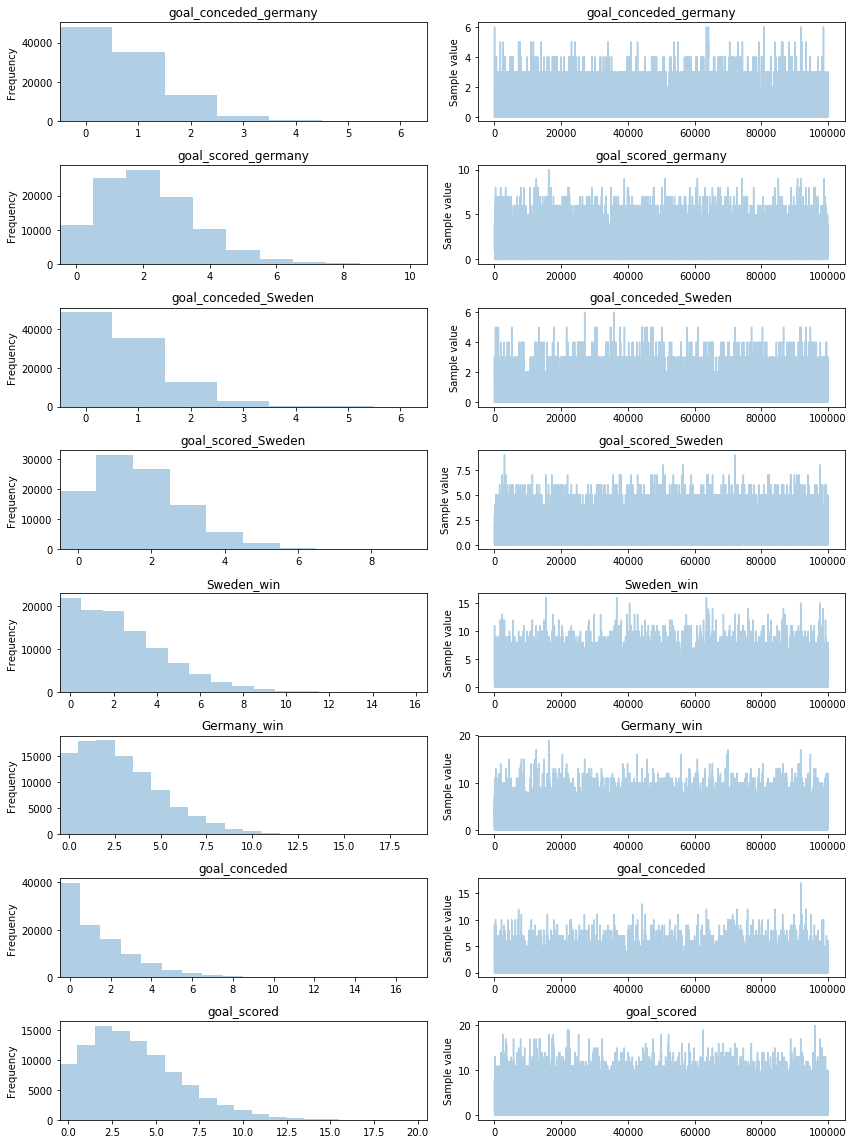

In [50]:
pm.traceplot(trace)

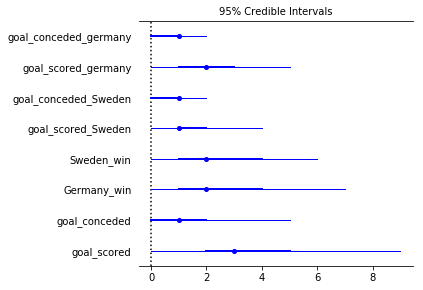

In [51]:
pm.forestplot(trace)

In [52]:
pm.summary(trace)


goal_conceded_germany:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.734            0.854            0.013            [0.000, 2.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          3.000


goal_scored_germany:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.141            1.444            0.020            [0.000, 5.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          2.000          3.000          5.000


goal_conceded_Sweden:

  Mean             SD               MC Error        

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000355216A0>,
      dtype=object)

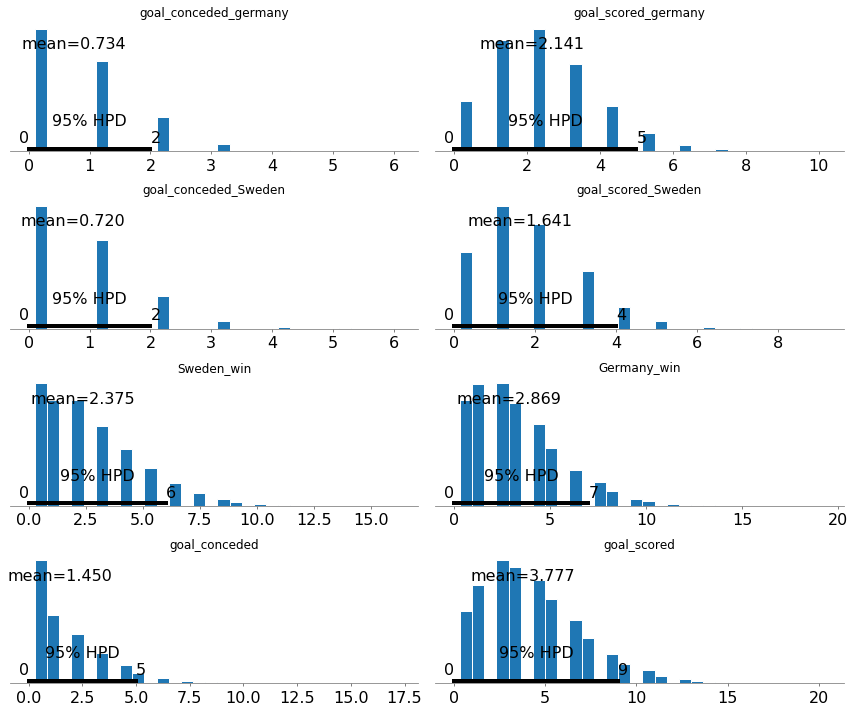

In [54]:
pm.plots.plot_posterior(trace)

In [80]:
pred = pd.DataFrame({
    "Germany": trace["Germany_win"][50000:],
    "Sweden": trace["Sweden_win"][50000:],
})


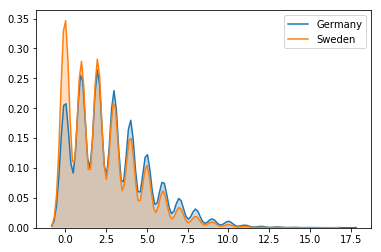

In [81]:
seaborn.kdeplot(pred.Germany, shade=True, label="Germany")
seaborn.kdeplot(pred.Sweden, shade=True, label="Sweden")
plt.show()

In [82]:
(pred.Germany > pred.Sweden).mean()

0.49288

In [83]:
(pred.Sweden > pred.Germany).mean()

0.35876

In [84]:
(pred.Sweden == pred.Germany).mean()

0.14836

In [115]:
1.0 * len(pred[(pred.Sweden == 0) & (pred.Germany==1)])  / len(pred)

0.04076

In [116]:
1.0 * len(pred[(pred.Sweden == 1) & (pred.Germany==1)])  / len(pred)

0.0326

In [114]:
1.0 * len(pred[(pred.Sweden == 2) & pred.Germany==4])  / len(pred)

0.0

In [101]:
1.0 * len(pred[(pred.Sweden == 0)])  / len(pred)

0.23346

In [102]:
1.0 * len(pred[(pred.Germany == 0)])  / len(pred)

0.1474

In [92]:
1.0 * len(pred[(pred.Germany == 3)])  / len(pred)

0.15264

In [93]:
1.0 * len(pred[(pred.Germany == 2)])  / len(pred)

0.17994

In [99]:
1.0 * len(pred[(pred.Germany == 5)])  / len(pred)

0.08568